In [2]:
import pandas as pd

mice_eeg_1 = pd.read_csv('pw3_data\EEG_mouse_data_1.csv')
mice_eeg_1

mice_egg_2 = pd.read_csv('pw3_data\EEG_mouse_data_2.csv')
mice_egg_2

mice_eeg_total = pd.concat([mice_eeg_1, mice_egg_2])

In [3]:
data_train = mice_eeg_total.iloc[:, :26]
data_train

,state,amplitude_around_1_Hertz,amplitude_around_2_Hertz,amplitude_around_3_Hertz,amplitude_around_4_Hertz,amplitude_around_5_Hertz,amplitude_around_6_Hertz,amplitude_around_7_Hertz,amplitude_around_8_Hertz,amplitude_around_9_Hertz,...,amplitude_around_16_Hertz,amplitude_around_17_Hertz,amplitude_around_18_Hertz,amplitude_around_19_Hertz,amplitude_around_20_Hertz,amplitude_around_21_Hertz,amplitude_around_22_Hertz,amplitude_around_23_Hertz,amplitude_around_24_Hertz,amplitude_around_25_Hertz
0,n,0.000009,0.000014,0.000013,0.000014,0.000023,0.000009,0.000019,0.000011,0.000016,...,1.121431e-06,9.572615e-07,7.912338e-07,2.075210e-06,2.125421e-06,9.183682e-07,1.442768e-06,1.315617e-06,1.882535e-06,3.555321e-07
1,n,0.000010,0.000010,0.000011,0.000015,0.000022,0.000017,0.000027,0.000011,0.000011,...,1.214325e-06,2.456797e-06,2.102875e-06,3.754975e-07,1.144381e-06,1.869306e-06,9.546215e-07,8.958666e-07,2.865039e-07,8.280935e-07
2,n,0.000011,0.000077,0.000034,0.000019,0.000013,0.000006,0.000010,0.000004,0.000006,...,2.251707e-06,3.322518e-06,1.112426e-06,8.238182e-07,8.392117e-07,6.979253e-07,4.631708e-07,3.179654e-07,3.833318e-07,2.466324e-07
3,w,0.000003,0.000031,0.000044,0.000016,0.000007,0.000006,0.000005,0.000007,0.000006,...,2.197342e-06,8.276670e-07,6.019235e-07,3.639088e-07,3.230235e-07,4.536860e-07,5.793950e-07,2.854656e-07,9.187695e-07,5.579241e-07
4,w,0.000010,0.000011,0.000012,0.000017,0.000020,0.000018,0.000014,0.000025,0.000018,...,3.330912e-06,3.003597e-06,3.560957e-06,1.856221e-06,8.180798e-07,1.657310e-06,2.038410e-06,9.678699e-07,6.374025e-07,8.643028e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20600,w,0.000025,0.000007,0.000007,0.000003,0.000005,0.000002,0.000005,0.000010,0.000013,...,7.605994e-07,5.857975e-07,2.008976e-06,1.047500e-06,8.361965e-07,1.187530e-06,1.362517e-06,1.155722e-06,4.674335e-07,4.710592e-07
20601,w,0.000017,0.000038,0.000015,0.000011,0.000019,0.000006,0.000010,0.000012,0.000009,...,4.660933e-07,4.797065e-07,1.377159e-06,1.549855e-06,2.014634e-06,1.006481e-06,1.255027e-06,7.684788e-07,1.131635e-06,1.080890e-06
20602,w,0.000016,0.000028,0.000031,0.000011,0.000019,0.000001,0.000015,0.000002,0.000007,...,9.727383e-07,5.698932e-07,8.794702e-07,9.412227e-07,7.479130e-07,1.173636e-07,8.319340e-07,1.222192e-07,1.277335e-07,2.256663e-07
20603,w,0.000013,0.000014,0.000020,0.000018,0.000007,0.000013,0.000009,0.000018,0.000005,...,7.172008e-07,1.828871e-06,5.327440e-07,5.149679e-07,6.310218e-07,4.164332e-07,3.309523e-07,8.170078e-07,6.630207e-07,9.615590e-07


In [4]:
data_train["state"][data_train["state"] == "w"] = -1
data_train["state"][data_train["state"] != -1] = 1

#data_train["state"].remplace('w', -1)

C:\Users\emily\AppData\Local\Temp\ipykernel_10096\1154354999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["state"][data_train["state"] == "w"] = -1
C:\Users\emily\AppData\Local\Temp\ipykernel_10096\1154354999.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train["state"][data_train["state"] != -1] = 1


In [5]:
data_train["state"]

0         1
1         1
2         1
3        -1
4        -1
         ..
20600    -1
20601    -1
20602    -1
20603    -1
20604    -1
Name: state, Length: 40863, dtype: object

In [16]:
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers
from sklearn.model_selection import KFold
def create_model():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(8, activation="tanh"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="tanh"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp = create_model()
mlp.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 8)              │           208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 217 (868.00 B)

 Trainable params: 217 (868.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4754 - val_loss: 0.4270
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4057 - val_loss: 0.3781
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3834 - val_loss: 0.3857
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3801 - val_loss: 0.3810
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3754 - val_loss: 0.3827
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3722 - val_loss: 0.3793
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3634 - val_loss: 0.3986
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3900 - val_loss: 0.4196
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3811 - val_loss: 0.3661
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3683 - val_loss: 0.4373
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3779 - val_loss: 0.3939
Epoch 12/100
852/852 ━━━━━━━━━━━━━━━━━━━━

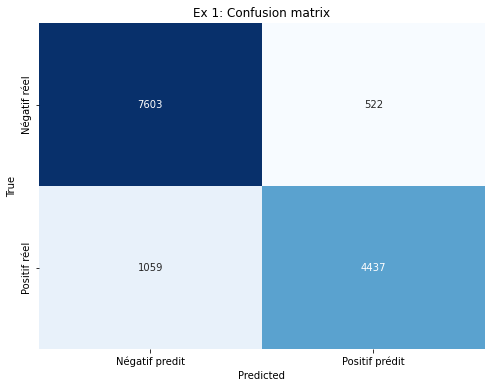

Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5261 - val_loss: 0.4573
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4583 - val_loss: 0.4530
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4560 - val_loss: 0.3847
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4077 - val_loss: 0.3927
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3923 - val_loss: 0.3857
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3885 - val_loss: 0.3895
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3935 - val_loss: 0.3649
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3789 - val_loss: 0.3973
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3888 - val_loss: 0.3938
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3778 - val_loss: 0.3951
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3896 - val_loss: 0.3932
Epoch 12/100
852/852 ━━━━━━━━━━━━━━━━━━━━

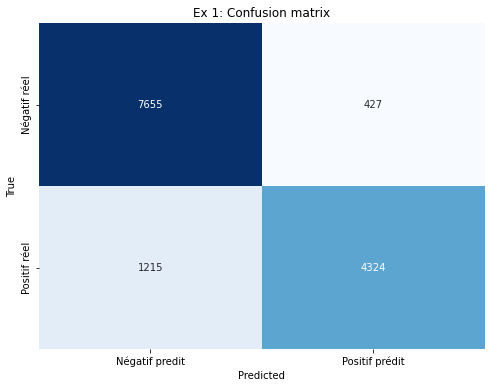

Epoch 1/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5126 - val_loss: 0.4659
Epoch 2/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4581 - val_loss: 0.4350
Epoch 3/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4288 - val_loss: 0.4326
Epoch 4/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4101 - val_loss: 0.4242
Epoch 5/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4161 - val_loss: 0.3876
Epoch 6/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4063 - val_loss: 0.4215
Epoch 7/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3934 - val_loss: 0.4038
Epoch 8/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3802 - val_loss: 0.3853
Epoch 9/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4129 - val_loss: 0.4460
Epoch 10/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4040 - val_loss: 0.4201
Epoch 11/100
852/852 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3968 - val_loss: 0.4367
Epoch 12/100
852/852 ━━━━━━━━━━━━━━━━━━━━

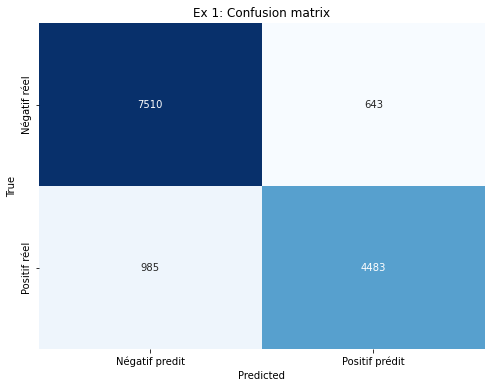

In [17]:
import matplotlib.pyplot as pl
from sklearn.preprocessing import StandardScaler
import keras
from keras import layers
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_confusion_matrix(confusion_matrix, title):
    # Plot confusion matrix
    pl.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix.astype(int), annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=["Négatif predit", "Positif prédit"], yticklabels=["Négatif réel", "Positif réel"])
    pl.title(title)
    pl.xlabel('Predicted')
    pl.ylabel('True')
    pl.show()


history_list = []
trained_mlp = []

scaler = StandardScaler()
data_train_normalized = scaler.fit_transform(data_train.iloc[:,1:])
data_train_normalized #.shape

keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(data_train_normalized)):
  
  input_data = np.float32(data_train_normalized)[train_index]
  output_data = np.float32(data_train['state'].to_numpy())[train_index]

  input_data_val = np.float32(data_train_normalized)[test_index]
  output_data_val = np.float32(data_train['state'].to_numpy())[test_index]
    # We need to create a new model everytime otherwise fit will continue previous training
  mlp = create_model()

  history = mlp.fit(
      x = input_data,
      y = output_data,
      validation_data =(input_data_val, output_data_val),
      epochs=100
  )

  pred_validation_classes = mlp(input_data_val) > 0
  output_data_val_classes = output_data_val > 0

  cm = confusion_matrix(output_data_val_classes, pred_validation_classes)
  plot_confusion_matrix(cm, "Ex 1: Confusion matrix")

  history_list.append(history)
  trained_mlp.append(mlp)


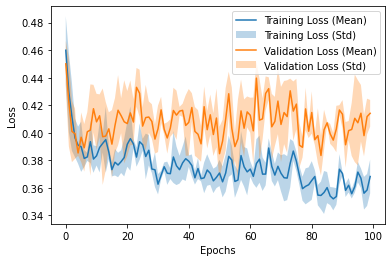

In [18]:
train_losses = np.array([history.history['loss'] for history in history_list])
val_losses = np.array([history.history['val_loss'] for history in history_list])

# Calculate mean and standard deviation for training and validation losses
mean_train_loss = np.mean(train_losses, axis=0)
std_train_loss = np.std(train_losses, axis=0)
mean_val_loss = np.mean(val_losses, axis=0)
std_val_loss = np.std(val_losses, axis=0)

# Plot mean and standard deviation for training loss
pl.plot(mean_train_loss, label='Training Loss (Mean)')
pl.fill_between(range(len(mean_train_loss)), mean_train_loss - std_train_loss, mean_train_loss + std_train_loss, alpha=0.3, label='Training Loss (Std)')

# Plot mean and standard deviation for validation loss
pl.plot(mean_val_loss, label='Validation Loss (Mean)')
pl.fill_between(range(len(mean_val_loss)), mean_val_loss - std_val_loss, mean_val_loss + std_val_loss, alpha=0.3, label='Validation Loss (Std)')

# Add labels and legend
pl.xlabel('Epochs')
pl.ylabel('Loss')
pl.legend()

# Display the plot
pl.show()

In [19]:
print(input_data)

[[-0.18343417 -0.32579064 -0.23051824 ...  0.25126752 -0.8361579
   0.3511537 ]
 [-0.14338918  3.6835458   1.3901839  ... -0.80473274 -0.64538926
  -0.8962209 ]
 [-0.4432612   0.9470617   2.0703652  ... -0.86411965  0.40952182
  -0.22842495]
 ...
 [-0.00800736  0.03031475 -0.27180138 ... -0.2164546  -0.07150355
  -1.2476485 ]
 [ 0.4009102  -0.46575662 -0.5250522  ...  0.7261015  -0.4796933
  -0.4147713 ]
 [-0.06242886 -0.08534876  0.37593293 ...  0.10716878 -0.0943504
   0.6374694 ]]


# Exercice 2

In [20]:
data_train_2 = mice_eeg_total.iloc[:, :26]
data_train_2.remplace("w", 0)
data_train_2.remplace("n", 1)
data_train_2.remplace("r", 2)

AttributeError: 'DataFrame' object has no attribute 'remplace'

In [ ]:
def create_model_2():
  # 2 inputs
  # 2 hidden nodes
  # 1 output

  mlp = keras.Sequential([
      layers.Input((25,)),
      layers.Dense(2, activation="softmax"), # Try different numbers of hidden neurons here (e.g. 2, 4, 8, 32, 128)
      layers.Dense(1, activation="softmax"),
  ])

  # Experiment with hyperparameters here:
  # momentum: [0, 0.8, 0.9, 0.99]
  # learning_rate: [0.1, 0.01, 0.001, 0.0001]
  mlp.compile(
      optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.99),  #0.01
      loss="mse",
  )

  return mlp

mlp_2 = create_model()
mlp_2.summary()

In [ ]:
history_list = []
trained_mlp = []


scaler = StandardScaler()
data_train_normalized = scaler.fit_transform(data_train.iloc[:,1:])
data_train_normalized #.shape


keras.utils.set_random_seed(123)
kf = KFold(n_splits=3, shuffle=True)

for i, (train_index, test_index) in enumerate(kf.split(data_train_normalized)):
  
  input_data = np.float32(data_train_normalized)[train_index]
  output_data = np.float32(data_train['state'].to_numpy())[train_index]

  input_data_val = np.float32(data_train_normalized)[test_index]
  output_data_val = np.float32(data_train['state'].to_numpy())[test_index]
    # We need to create a new model everytime otherwise fit will continue previous training
  mlp = create_model()

  history = mlp.fit(
      x = input_data,
      y = output_data,
      validation_data =(input_data_val, output_data_val),
      epochs=100
  )

  pred_validation_classes = mlp(input_data_val) > 0
  output_data_val_classes = output_data_val > 0

  cm = confusion_matrix(output_data_val_classes, pred_validation_classes)
  plot_confusion_matrix(cm, "Ex 1: Confusion matrix")

  history_list.append(history)
  trained_mlp.append(mlp)